In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [51]:
pd.set_option('display.max_columns', None)

In [52]:
df = pd.read_csv("data/cleaned_data/hyderabad/hyd_properties_outlier_treated.csv")
df.head(3)

,property_type,bhk,area,society_name,locality,city,price_in_crore,price_per_sqft,status,new_resale,price_negotiable,age_of_property,bathrooms,carpet_area,floor,booking_amount,balconies,additional_rooms,security_deposit,furnishing_type,facing,overlooking,ownership_type,amenities,furnish_details
0,Apartment,2,1120.0,NaN,Asmangarh,Hyderabad,0.58,5178.0,Ready to move,Resale,Yes,Old Property,2.0,993.55,4.0,500000.0,1.0,pooja room,No Deposit,Semi-Furnished,North,Road View,Freehold,"Landscaped Gardens, Lift(s), Swimming Pool, Gy...",Sofa
1,Apartment,3,1905.0,Asbl Asbl Spire,Kokapet,Hyderabad,1.39,7349.0,Under Construction,New,Yes,Unknown,3.0,1689.92,9.0,NaN,NaN,NaN,No Deposit,Unfurnished,NaN,NaN,Freehold,NaN,NaN
2,Independent House,10,14400.0,NaN,Banjara Hills,Hyderabad,17.47,12131.0,Ready to move,Resale,No,Unknown,11.0,12774.19,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,North,NaN,NaN,NaN,NaN


In [53]:
df.shape

(13617, 25)

#### Check Duplicate Rows

In [54]:
df.duplicated().sum()

np.int64(52)

In [55]:
df[df.duplicated(keep=False)].sort_values(['property_type','bhk','area','society_name','locality'])

,property_type,bhk,area,society_name,locality,city,price_in_crore,price_per_sqft,status,new_resale,price_negotiable,age_of_property,bathrooms,carpet_area,floor,booking_amount,balconies,additional_rooms,security_deposit,furnishing_type,facing,overlooking,ownership_type,amenities,furnish_details
4328,Apartment,1,607.0,Nebula Aavaas,Miyapur,Hyderabad,0.36,6000.0,Under Construction,New,No,Unknown,1.0,538.47,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,East,NaN,NaN,"Swimming Pool, Lift(s), Rain Water Harvesting,...",NaN
12034,Apartment,1,607.0,Nebula Aavaas,Miyapur,Hyderabad,0.36,6000.0,Under Construction,New,No,Unknown,1.0,538.47,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,East,NaN,NaN,"Swimming Pool, Lift(s), Rain Water Harvesting,...",NaN
3490,Apartment,2,1050.0,Golden Residency,Panchavati Colony,Hyderabad,0.42,4000.0,Ready to move,New,No,Unknown,2.0,931.45,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,NorthEast,NaN,NaN,"Full Power Backup, Lift(s)",Gas connection
6238,Apartment,2,1050.0,Golden Residency,Panchavati Colony,Hyderabad,0.42,4000.0,Ready to move,New,No,Unknown,2.0,931.45,NaN,NaN,NaN,NaN,No Deposit,Semi-Furnished,NorthEast,NaN,NaN,"Full Power Backup, Lift(s)",Gas connection
1809,Apartment,2,1060.0,NaN,Miyapur Hmt Swarnapuri Colony,Hyderabad,0.51,4800.0,Under Construction,New,Yes,Unknown,2.0,940.32,4.0,500000.0,2.0,NaN,No Deposit,Unfurnished,East,Road View,Freehold,"Rain Water Harvesting, Car Parking, Vaastu Com...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,Apartment,3,2250.0,NaN,Kukatpally,Hyderabad,1.65,7333.0,Under Construction,New,No,Unknown,3.0,1995.97,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,East,NaN,NaN,NaN,NaN
4313,Apartment,3,2250.0,NaN,Kukatpally,Hyderabad,1.65,7333.0,Under Construction,New,No,Unknown,3.0,1995.97,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,East,NaN,NaN,NaN,NaN
12524,Apartment,3,2250.0,NaN,Kukatpally,Hyderabad,1.65,7333.0,Under Construction,New,No,Unknown,3.0,1995.97,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,East,NaN,NaN,NaN,NaN
8923,Apartment,3,2610.0,Radhey Skye,Velmala,Hyderabad,1.50,5747.0,Under Construction,New,No,Unknown,4.0,2315.32,NaN,NaN,NaN,NaN,No Deposit,Unfurnished,NaN,NaN,NaN,"Swimming Pool, ATM, Indoor Games, Gymnasium",NaN


In [56]:
df1 = df.drop_duplicates()
df1.duplicated().sum()

np.int64(0)

In [57]:
df1.isnull().sum()

property_type           0
bhk                     0
area                    0
society_name         7058
locality                0
city                    0
price_in_crore          0
price_per_sqft          0
status                  0
new_resale              0
price_negotiable        0
age_of_property         0
bathrooms            1749
carpet_area             0
floor               10637
booking_amount      10141
balconies           10819
additional_rooms    11393
security_deposit        0
furnishing_type         0
facing               5173
overlooking         10994
ownership_type       9608
amenities            3373
furnish_details      9420
dtype: int64

#### Bathrooms

In [58]:
df1['bathrooms'].isnull().sum()

np.int64(1749)

- In this approach, missing values in the bathrooms column are filled in two steps:
    - Step 1: Fill missing bathrooms values by grouping properties with the same bhk and area. For each group, the median number of bathrooms is calculated and used to replace NaN values within that group.
    - Step 2: For any remaining missing values, group the data by bhk and fill the missing values with the median number of bathrooms for that specific bhk group.

In [59]:
# Step 1: Fill NaN using the median number of bathrooms for properties with similar bhk and area
df1['bathrooms'] = df1.groupby(['bhk', 'area'])['bathrooms'].transform(lambda x: x.fillna(np.floor(x.median())))

# Step 2: For any remaining NaNs, fill them using the median number of bathrooms for the same BHK
df1['bathrooms'] = df1.groupby('bhk')['bathrooms'].transform(lambda x: x.fillna(np.floor(x.median())))

df1['bathrooms'] = df1['bathrooms'].astype(int)
df1['bathrooms'].isnull().sum()

np.int64(0)

In [60]:
df1['bathrooms'].describe()

count    13565.000000
mean         2.797862
std          0.977849
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         11.000000
Name: bathrooms, dtype: float64

<Axes: xlabel='bathrooms', ylabel='Count'>

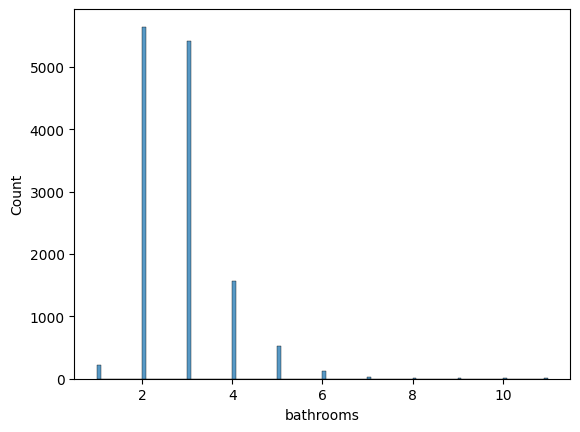

In [61]:
sns.histplot(df1['bathrooms'])

#### floor

In [62]:
df1['floor'].isnull().sum()

np.int64(10637)

- In this approach, missing floor values are filled by:
    - Step 1: Assign floor value 0 to the properties whose value is Villa.
    - Step 2: Grouping properties by bhk, property_type, and locality and filling missing values with the most frequent (mode) floor within each group.
    - Step 3: For any remaining NaNs, filling them with the mode based on just bhk and property_type.
    - Step 4: As a final step, using the overall mode of the floor column to fill any remaining missing values.

In [63]:
# Step 1: Set 'floor' to 0 for all villas since villas don't have floors
df1.loc[df1['property_type'] == 'villa', 'floor'] = 0

# Step 2: Fill NaN values by grouping by 'bhk', 'property_type', and 'locality' using the mode
df1['floor'] = df1.groupby(['bhk', 'property_type', 'locality'])['floor'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Step 3: For any remaining NaNs, fill them using the mode of 'bhk' and 'property_type'
df1['floor'] = df1.groupby(['bhk', 'property_type'])['floor'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

# Step 4: Finally, fill any remaining NaNs using the overall mode for the entire 'floor' column
overall_mode = df1['floor'].mode()[0]
df1['floor'] = df1['floor'].fillna(overall_mode)

df1['floor'].isna().sum()

np.int64(0)

In [64]:
df1['floor'].describe()

count    13565.000000
mean         3.786067
std          3.953124
min          0.000000
25%          2.000000
50%          2.000000
75%          5.000000
max         48.000000
Name: floor, dtype: float64

In [65]:
df1['floor'].unique()

array([ 4.,  9.,  2.,  1.,  7., 16.,  5.,  8.,  3.,  0., 10., 20., 17.,
       14.,  6., 11., 34., 15., 12., 18., 19., 22., 27., 13., 38., 24.,
       39., 23., 21., 46., 43., 42., 28., 30., 48., 33., 26., 32., 40.,
       41., 36., 29., 31.])

<Axes: xlabel='floor', ylabel='Count'>

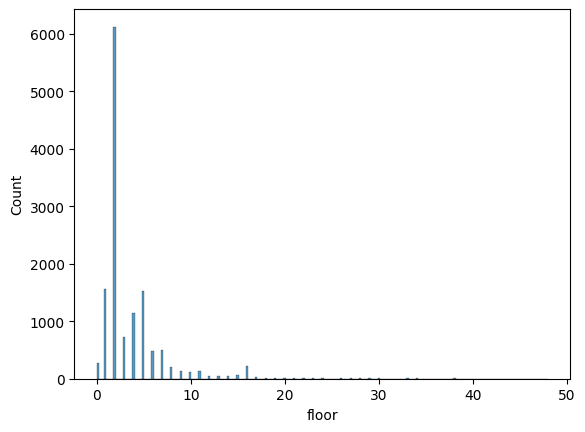

In [66]:
sns.histplot(df1['floor'])

In [67]:
df1[df1['floor'] > 40][['property_type', 'bhk', 'locality','price_in_crore', 'floor']]

,property_type,bhk,locality,price_in_crore,floor
1756,Apartment,4,Nanakramguda,3.44,46.0
1843,Apartment,4,Nanakramguda,4.29,43.0
1988,Apartment,3,Nanakramguda,1.61,42.0
2647,Apartment,4,Nanakramguda,3.03,48.0
5773,Apartment,2,Miyapur,0.92,41.0
8894,Apartment,4,Nanakramguda,3.15,41.0
9219,Apartment,4,Nanakramguda,3.41,46.0
10460,Apartment,4,Nanakramguda,3.55,46.0


The data points appear legitimate for the current real estate market in Hyderabad, especially for high-rise apartments in prime locations like Nanakramguda.

#### balconies

In [68]:
df1['balconies'].unique()

array([ 1., nan,  2.,  4.,  3.,  5.,  6.])

In [69]:
df1['balconies'].isnull().sum()

np.int64(10819)

- In this approach, missing values in the balconies column are filled as follows:

    - Step 1: Group properties by bhk and area, and fill missing balconies values with the median number of balconies within each group.
    - Step 2: For any remaining missing values, group by property_type and fill them with the most frequent (mode) number of balconies within each property type.

##### Filling by Median Based on Similar Features

In [70]:
# Fill NaN using the median number of balconies for properties with similar bhk and area
df1['balconies'] = df1.groupby(['bhk', 'area'])['balconies'].transform(
    lambda x: x.fillna(round(x.median()) if not np.isnan(x.median()) else np.nan)
)

# Fill NaN using the mode number of balconies for each property type
df1['balconies'] = df1.groupby('property_type')['balconies'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan)
)

df1['balconies'].isnull().sum()

np.int64(0)

<Axes: xlabel='balconies', ylabel='Count'>

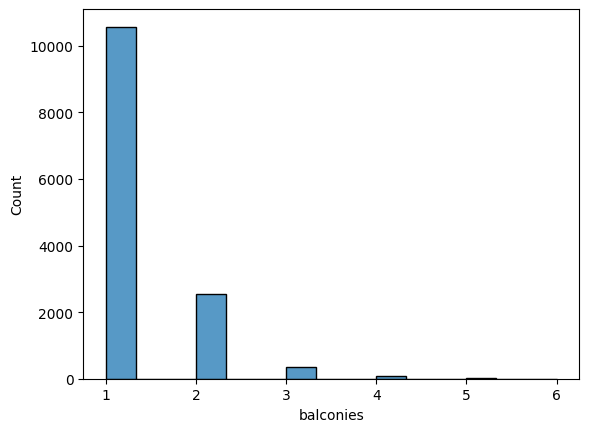

In [71]:
sns.histplot(df1['balconies'])

#### facing

In [72]:
df1['facing'].unique()

array(['North', nan, 'East', 'West', 'NorthEast', 'SouthEast', 'South',
       'NorthWest', 'SouthWest'], dtype=object)

In [73]:
df1['facing'].isnull().sum()

np.int64(5173)

- In this approach, missing values in the facing column are filled as follows:
    - Step-1: Missing values in the facing column are filled using the mode (most frequent value) within groups defined by locality, property_type, and bhk.
    - Step-2: If a group has no mode, fill with overall_mode 

In [74]:
overall_mode = df1['facing'].mode()[0]

# Define a function to fill missing values with mode
def fill_with_mode(group):
    mode_value = group.mode()[0] if not group.mode().empty else overall_mode
    return group.fillna(mode_value)

# Group by relevant columns and fill missing values
df1['facing'] = df1.groupby(['locality', 'property_type', 'bhk'])['facing'].transform(fill_with_mode)
df1['facing'].isnull().sum()

np.int64(0)

In [75]:
df1['facing'].value_counts()

facing
East         8985
West         2624
North        1078
NorthEast     496
South         110
NorthWest      99
SouthEast      87
SouthWest      86
Name: count, dtype: int64

In [76]:
df1.isnull().sum()

property_type           0
bhk                     0
area                    0
society_name         7058
locality                0
city                    0
price_in_crore          0
price_per_sqft          0
status                  0
new_resale              0
price_negotiable        0
age_of_property         0
bathrooms               0
carpet_area             0
floor                   0
booking_amount      10141
balconies               0
additional_rooms    11393
security_deposit        0
furnishing_type         0
facing                  0
overlooking         10994
ownership_type       9608
amenities            3373
furnish_details      9420
dtype: int64

In [77]:
df1.head(3)

,property_type,bhk,area,society_name,locality,city,price_in_crore,price_per_sqft,status,new_resale,price_negotiable,age_of_property,bathrooms,carpet_area,floor,booking_amount,balconies,additional_rooms,security_deposit,furnishing_type,facing,overlooking,ownership_type,amenities,furnish_details
0,Apartment,2,1120.0,NaN,Asmangarh,Hyderabad,0.58,5178.0,Ready to move,Resale,Yes,Old Property,2,993.55,4.0,500000.0,1.0,pooja room,No Deposit,Semi-Furnished,North,Road View,Freehold,"Landscaped Gardens, Lift(s), Swimming Pool, Gy...",Sofa
1,Apartment,3,1905.0,Asbl Asbl Spire,Kokapet,Hyderabad,1.39,7349.0,Under Construction,New,Yes,Unknown,3,1689.92,9.0,NaN,1.0,NaN,No Deposit,Unfurnished,East,NaN,Freehold,NaN,NaN
2,Independent House,10,14400.0,NaN,Banjara Hills,Hyderabad,17.47,12131.0,Ready to move,Resale,No,Unknown,11,12774.19,2.0,NaN,1.0,NaN,No Deposit,Semi-Furnished,North,NaN,NaN,NaN,NaN


- The columns 'society_name', 'status', 'price_negotiable', 'booking_amount', 'security_deposit', 'overlooking', 'ownership_type' are unnecessary so that we will drop them.
- We will perform feature engineering on the columns 'additional_rooms', 'amenities', and 'furnish_details'.

#### Drop the features which are not required for model

In [80]:
cols_to_drop = ['society_name','status','price_negotiable','booking_amount','security_deposit','overlooking', 'ownership_type']
df2 = df1.drop(cols_to_drop, axis='columns')
df2.head(3)

,property_type,bhk,area,locality,city,price_in_crore,price_per_sqft,new_resale,age_of_property,bathrooms,carpet_area,floor,balconies,additional_rooms,furnishing_type,facing,amenities,furnish_details
0,Apartment,2,1120.0,Asmangarh,Hyderabad,0.58,5178.0,Resale,Old Property,2,993.55,4.0,1.0,pooja room,Semi-Furnished,North,"Landscaped Gardens, Lift(s), Swimming Pool, Gy...",Sofa
1,Apartment,3,1905.0,Kokapet,Hyderabad,1.39,7349.0,New,Unknown,3,1689.92,9.0,1.0,NaN,Unfurnished,East,NaN,NaN
2,Independent House,10,14400.0,Banjara Hills,Hyderabad,17.47,12131.0,Resale,Unknown,11,12774.19,2.0,1.0,NaN,Semi-Furnished,North,NaN,NaN


In [81]:
df2.shape

(13565, 18)

#### save this imputed df to csv

In [82]:
df2.to_csv("data/cleaned_data/hyderabad/hyd_properties_imputed.csv", index=False)